In [303]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [304]:
img = cv2.imread('./test_images/dr_apj_ak.jpg')
img.shape

(549, 976, 3)

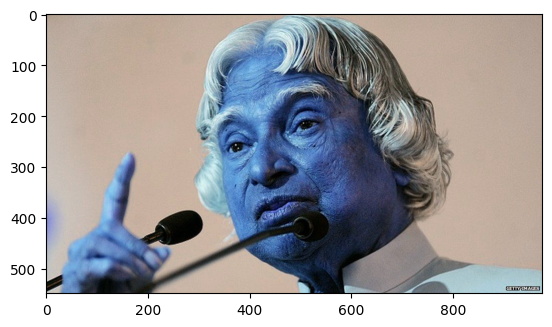

In [305]:
plt.imshow(img);

In [306]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(549, 976)

In [307]:
gray

array([[147, 152, 154, ..., 158, 157, 153],
       [144, 150, 154, ..., 158, 155, 149],
       [143, 149, 156, ..., 156, 154, 151],
       ...,
       [ 70, 124, 178, ..., 206, 206, 206],
       [176, 196, 206, ..., 206, 206, 207],
       [222, 222, 207, ..., 206, 207, 207]], dtype=uint8)

In [308]:
test_image = cv2.imread('./test_images/apj.png')
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

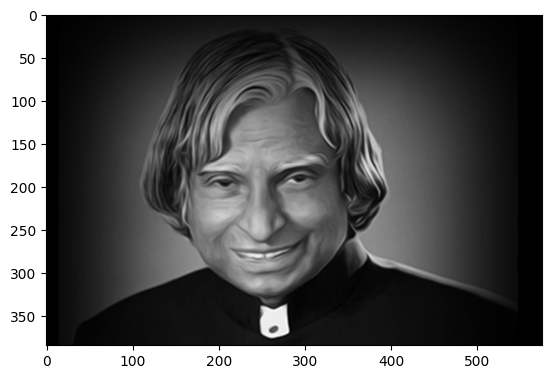

In [309]:
plt.imshow(gray, cmap='gray')

In [310]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.5,3)
faces

array([[169, 133, 182, 182]], dtype=int32)

In [311]:
(x,y,w,h) = faces[0]
x,y,w,h

(169, 133, 182, 182)

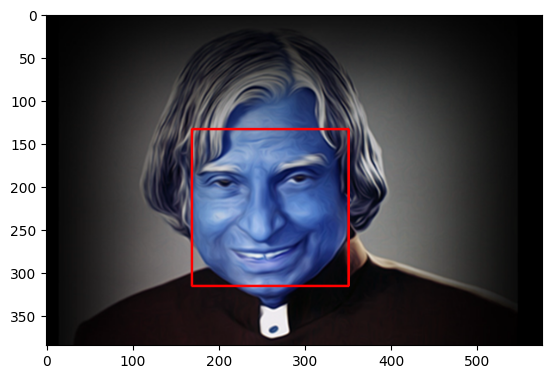

In [312]:
face_img = cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

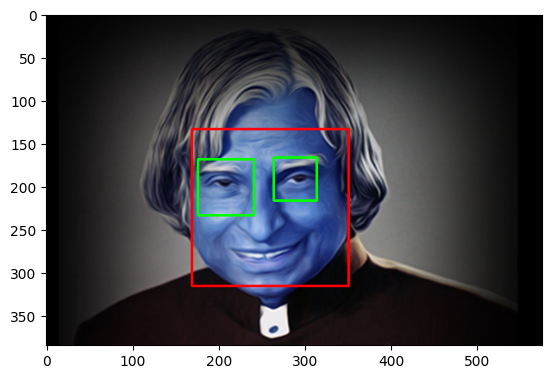

In [313]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color =face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

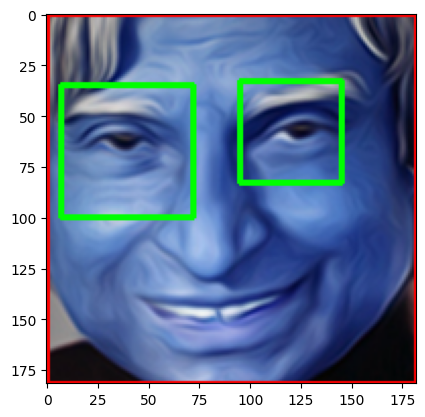

In [314]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [315]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    # Check if img is None (failed to load image)
    if img is None:
        print(f"Error: Unable to load image from {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
#             print("Sucess")
            return roi_color
    return None  # Return None if no suitable cropped image found

# Keep an eye for path at which you are saving. (Don't waste 3 hours and blame OpenCV for not working properly XD)

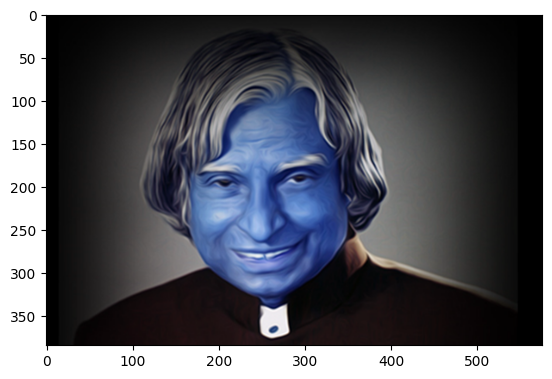

In [316]:
original_image = cv2.imread('./test_images/apj.png')
plt.imshow(original_image)

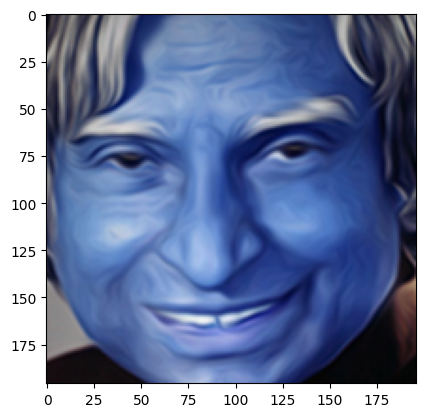

In [317]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/apj.png')
plt.imshow(cropped_image)

In [321]:
path_to_data = './dataset'
path_to_crp_data = './dataset/cropped/'

In [322]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [323]:
img_dirs

['./dataset/cropped',
 './dataset/Nikola_Tesla',
 './dataset/Richard_Feynman',
 './dataset/APJ_Abdul_Kalam',
 './dataset/Albert_Einstein',
 './dataset/CV_Raman']

In [324]:
import shutil
if os.path.exists(path_to_crp_data):
    shutil.rmtree(path_to_crp_data)
    
os.mkdir(path_to_crp_data)

In [325]:
cropped_image_dirs = []
sci_file_names_dict = {}

for img_dir in img_dirs[1:]:
    count = 1
    scientist_name = img_dir.split('/')[-1]
    print(scientist_name)
    
    sci_file_names_dict[scientist_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crp_data + scientist_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating cropped images in folder: {cropped_folder}")
                
            cropped_file_name = scientist_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
#             print("saving at",cropped_file_path)
            
            cv2.imwrite(cropped_file_path, roi_color)
            sci_file_names_dict[scientist_name].append(cropped_file_path)
            count += 1

Nikola_Tesla
Generating cropped images in folder: ./dataset/cropped/Nikola_Tesla


libpng warning: iCCP: known incorrect sRGB profile


Richard_Feynman
Generating cropped images in folder: ./dataset/cropped/Richard_Feynman
APJ_Abdul_Kalam
Generating cropped images in folder: ./dataset/cropped/APJ_Abdul_Kalam
Albert_Einstein
Generating cropped images in folder: ./dataset/cropped/Albert_Einstein
CV_Raman
Generating cropped images in folder: ./dataset/cropped/CV_Raman


In [336]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

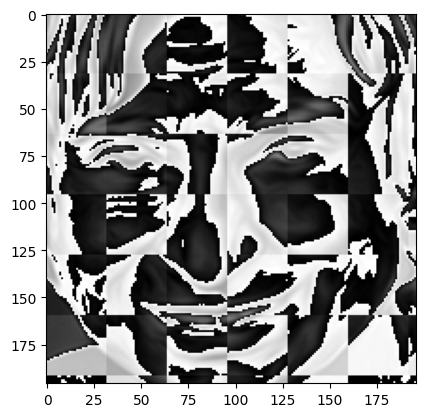

In [337]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [338]:
sci_file_names_dict

{'Nikola_Tesla': ['./dataset/cropped/Nikola_Tesla/Nikola_Tesla1.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla2.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla3.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla4.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla5.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla6.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla7.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla8.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla9.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla10.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla11.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla12.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla13.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla14.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla15.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla16.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla17.png',
  './dataset/cropped/Nikola_Tesla/Nikola_Tesla18.png',
  '

In [367]:
class_dict = {}
count = 0
for scientist_name in sci_file_names_dict.keys():
    class_dict[scientist_name] = count
    count += 1
class_dict

{'Nikola_Tesla': 0,
 'Richard_Feynman': 1,
 'APJ_Abdul_Kalam': 2,
 'Albert_Einstein': 3,
 'CV_Raman': 4}

In [368]:
X, y = [], []
for scientist_name, training_files in sci_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
            
        scaled_raw_img = cv2.resize(img, (32, 32))
        
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[scientist_name])  

[ WARN:0@50523.527] global loadsave.cpp:244 findDecoder imread_('./dataset/cropped/Nikola_Tesla/Nikola_Tesla8.png'): can't open/read file: check file path/integrity
[ WARN:0@50523.551] global loadsave.cpp:244 findDecoder imread_('./dataset/cropped/Nikola_Tesla/Nikola_Tesla12.png'): can't open/read file: check file path/integrity
[ WARN:0@50523.693] global loadsave.cpp:244 findDecoder imread_('./dataset/cropped/Richard_Feynman/Richard_Feynman1.png'): can't open/read file: check file path/integrity
[ WARN:0@50523.729] global loadsave.cpp:244 findDecoder imread_('./dataset/cropped/Richard_Feynman/Richard_Feynman10.png'): can't open/read file: check file path/integrity
[ WARN:0@50523.826] global loadsave.cpp:244 findDecoder imread_('./dataset/cropped/Richard_Feynman/Richard_Feynman29.png'): can't open/read file: check file path/integrity
[ WARN:0@50524.978] global loadsave.cpp:244 findDecoder imread_('./dataset/cropped/CV_Raman/CV_Raman7.png'): can't open/read file: check file path/integri

In [369]:
len(X[0])

4096

In [370]:
len(X)

213

In [371]:
X[0]

array([[138],
       [138],
       [138],
       ...,
       [ 44],
       [185],
       [149]], dtype=uint8)

In [372]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(213, 4096)

In [373]:
X[0]

array([138., 138., 138., ...,  44., 185., 149.])

In [374]:
len(X[0])

4096

In [375]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

## Training Model

Using SVM with rbf kernel

In [380]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [382]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8518518518518519

In [383]:
len(X_test)

54

In [384]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.57      0.80      0.67         5
           2       0.88      1.00      0.93        14
           3       0.82      0.60      0.69        15
           4       0.92      1.00      0.96        11

    accuracy                           0.85        54
   macro avg       0.84      0.86      0.84        54
weighted avg       0.86      0.85      0.85        54



# Using GridSearchCV

In [385]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [386]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
            
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [387]:
import pandas as pd

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.842742,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.679839,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.874194,{'logisticregression__C': 1}


In [388]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [390]:
best_estimators['svm'].score(X_test,y_test)

0.8888888888888888

In [391]:
best_estimators['random_forest'].score(X_test,y_test)

0.7222222222222222

In [392]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9074074074074074

In [393]:
best_clf = best_estimators['svm']

In [396]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  1,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 14,  0,  0],
       [ 1,  3,  1, 10,  0],
       [ 0,  0,  0,  0, 11]])

Text(95.72222222222221, 0.5, 'Truth')

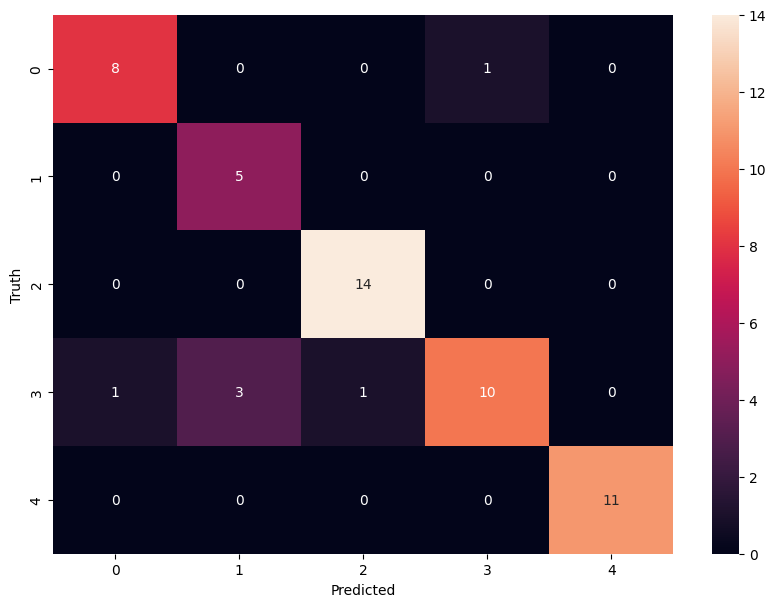

In [397]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Saving the trained model

In [398]:
import joblib

In [399]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

# Saving the class dictionary

In [400]:
import json

In [401]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))